# Exploratory Data Analysis 

## 1. Import libraries and data

In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import processing_functions as pf


### Loading datasets

In [2]:
parent_dir = os.path.abspath('..')
datasets_path = os.path.join(parent_dir, 'datasets')
files = os.listdir(datasets_path)
files.remove('URL descripcion reto.txt')
files.remove('leeme.txt')
dfs = {}

In [3]:
print(files)

['Biorreactor 14618.xlsx', 'Biorreactor 13169.xlsx', 'Biorreactor 14614.xlsx', '.DS_Store', 'Biorreactor 14615.xlsx', 'Horas inicio fin centrífugas.xlsx', 'Centrífuga 17825.xlsx', 'Biorreactor 13172.xlsx', 'Cinéticos IPC.xlsx', 'Centrífuga 12912.xlsx', 'Fases producción_test v02.xlsx', 'Fases producción v03 Test.xlsx', 'Temperaturas y humedades.xlsx', 'Fases producción v02.xlsx', 'Biorreactor 13171.xlsx', 'OF 123456 v03.xlsx', 'Biorreactor 14616.xlsx', 'Centrífuga 14246.xlsx', 'Biorreactor 14617.xlsx', 'Movimientos componentes.xlsx', 'OF 123456 v02.xlsx', 'Biorreactor 13170.xlsx', 'Fases producción v03.xlsx']


In [4]:
# Open all files and read all sheets
for file in files:
    if file.endswith('.xlsx'):  # Process only Excel files
        pf.open_file(file, datasets_path, dfs)

In [5]:
print(dfs.keys())

dict_keys(['Biorreactor 14618_WData', 'Biorreactor 14618_Datos', 'Biorreactor 13169_WData', 'Biorreactor 13169_Datos', 'Biorreactor 14614_Datos', 'Biorreactor 14615_WData', 'Biorreactor 14615_Datos', 'Horas inicio fin centrífugas_Hoja1', 'Centrífuga 17825_WData', 'Centrífuga 17825_Datos', 'Biorreactor 13172_WData', 'Biorreactor 13172_Datos', 'Cinéticos IPC_Inóculos', 'Cinéticos IPC_Cultivos finales', 'Cinéticos IPC_Centrifugación', 'Centrífuga 12912_WData', 'Centrífuga 12912_Datos', 'Fases producción_test v02_Cultivo final', 'Fases producción v03 Test_Cultivo final', 'Temperaturas y humedades_WData', 'Temperaturas y humedades_Datos', 'Fases producción v02_Preinóculo', 'Fases producción v02_Inóculo', 'Fases producción v02_Cultivo final', 'Biorreactor 13171_WData', 'Biorreactor 13171_Datos', 'OF 123456 v03_Sheet1', 'Biorreactor 14616_WData', 'Biorreactor 14616_Datos', 'Centrífuga 14246_WData', 'Centrífuga 14246_Datos', 'Biorreactor 14617_WData', 'Biorreactor 14617_Datos', 'Movimientos co

In [6]:
# easier access to dataframes
biorreactor_14618_wdata = dfs['Biorreactor 14618_WData']
biorreactor_14618_datos = dfs['Biorreactor 14618_Datos']
biorreactor_13169_wdata = dfs['Biorreactor 13169_WData']
biorreactor_13169_datos = dfs['Biorreactor 13169_Datos']
biorreactor_14614_datos = dfs['Biorreactor 14614_Datos']
biorreactor_14615_wdata = dfs['Biorreactor 14615_WData']
biorreactor_14615_datos = dfs['Biorreactor 14615_Datos']
horas_inicio_fin_centrifugas = dfs['Horas inicio fin centrífugas_Hoja1']
centrifuga_17825_wdata = dfs['Centrífuga 17825_WData']
centrifuga_17825_datos = dfs['Centrífuga 17825_Datos']
biorreactor_13172_wdata = dfs['Biorreactor 13172_WData']
biorreactor_13172_datos = dfs['Biorreactor 13172_Datos']
cineticos_ipc_inoculos = dfs['Cinéticos IPC_Inóculos']
cineticos_ipc_cultivos_finales = dfs['Cinéticos IPC_Cultivos finales']
cineticos_ipc_centrifugacion = dfs['Cinéticos IPC_Centrifugación']
centrifuga_12912_wdata = dfs['Centrífuga 12912_WData']
centrifuga_12912_datos = dfs['Centrífuga 12912_Datos']
# fases_produccion_test_v02_cultivo_final = dfs['Fases producción_test v02_Cultivo final']
df_test_cultivo_final = dfs['Fases producción v03 Test_Cultivo final']
temperaturas_y_humedades_wdata = dfs['Temperaturas y humedades_WData']
temperaturas_y_humedades_datos = dfs['Temperaturas y humedades_Datos']
fases_produccion_v02_preinoculo = dfs['Fases producción v02_Preinóculo']
# fases_produccion_v02_inoculo = dfs['Fases producción v02_Inóculo']
# fases_produccion_v02_cultivo_final = dfs['Fases producción v02_Cultivo final']
biorreactor_13171_wdata = dfs['Biorreactor 13171_WData']
biorreactor_13171_datos = dfs['Biorreactor 13171_Datos']
biorreactor_14616_wdata = dfs['Biorreactor 14616_WData']
biorreactor_14616_datos = dfs['Biorreactor 14616_Datos']
centrifuga_14246_wdata = dfs['Centrífuga 14246_WData']
centrifuga_14246_datos = dfs['Centrífuga 14246_Datos']
biorreactor_14617_wdata = dfs['Biorreactor 14617_WData']
biorreactor_14617_datos = dfs['Biorreactor 14617_Datos']
movimientos_componentes_full1 = dfs['Movimientos componentes_Full1']
of_123456_v02_sheet1 = dfs['OF 123456 v02_Sheet1']
biorreactor_13170_wdata = dfs['Biorreactor 13170_WData']
biorreactor_13170_datos = dfs['Biorreactor 13170_Datos']
df_preinoculo = dfs['Fases producción v03_Preinóculo']
df_inoculo = dfs['Fases producción v03_Inóculo']
df_cultivo_final = dfs['Fases producción v03_Cultivo final']
of_123456_v03 = dfs['OF 123456 v03_Sheet1']

In [7]:
# FASE DE PRODUCCION 1
df_preinoculo_columns = ['LOTE', 'Fecha_Hora_Inicio', 'Fecha_Hora_Fin','ph1', 'ph2', 'ph3', 'turb1', 'turb2', 'turb3', 'linea1', 'linea2', 'linea3']
df_preinoculo.columns = df_preinoculo_columns
df_preinoculo = df_preinoculo.iloc[1:].reset_index(drop=True)
df_preinoculo.head()

,LOTE,Fecha_Hora_Inicio,Fecha_Hora_Fin,ph1,ph2,ph3,turb1,turb2,turb3,linea1,linea2,linea3
0,23019,2023-03-19 05:00:00,2023-03-20 07:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23020,2023-03-19 05:00:00,2023-03-20 07:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23021,2023-03-20 05:00:00,2023-03-21 06:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23022,2023-03-20 05:00:00,2023-03-21 06:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23023,2023-03-26 05:00:00,2023-03-27 07:21:00,5.496,5.504,5.52,28.32,27.92,32,1,1,0


In [8]:
# FASE DE PRODUCCION 2
df_inoculo.head()

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final culttivo,Viabilidad final cultivo
0,23019,13171,2023-03-20 07:24:00,2023-03-21 06:47:00,168.16,NR,32.80,134400000
1,23020,13171,2023-03-20 07:24:00,2023-03-21 06:47:00,168.16,NR,32.80,134400000
2,23021,14618,2023-03-21 06:37:00,2023-03-22 06:55:00,168.00,NR,27.84,115200000
3,23022,14618,2023-03-21 06:37:00,2023-03-22 06:55:00,168.00,NR,27.84,115200000
4,23023,14618,2023-03-27 07:22:00,2023-03-28 07:29:00,155.20,18.24,31.68,106400000


In [9]:
# FASE PRODUCCION 3
df_cultivo_final.head()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,NaN,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.2,184000000,17825,NaN,NaN,1747.920,6.00
1,23020,1,NaN,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.2,181600000,14246,NaN,NaN,1676.160,6.56
2,23021,1,NaN,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.4,248000000,17825,NaN,NaN,1928.496,8.08
3,23022,1,NaN,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.2,229600000,12912,NaN,NaN,1782.800,5.92
4,23023,1,NaN,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,74.4,132800000,17825,26.56,20.88,1861.840,2.96


## 2. Extracting Relevant Information of each dataset

In [10]:
pf.preprocess_dataset(df_inoculo, df_inoculo.columns)

------ Dataset Info ------
Shape: (168, 8)
Columns: ['LOTE', 'ID bioreactor', 'Fecha/hora inicio', 'Fecha/hora fin', 'Volumen de cultivo', 'Turbidez inicio cultivo', 'Turbidez final culttivo', 'Viabilidad final cultivo']
First few rows:
    LOTE  ID bioreactor   Fecha/hora inicio      Fecha/hora fin  \
0  23019          13171 2023-03-20 07:24:00 2023-03-21 06:47:00   
1  23020          13171 2023-03-20 07:24:00 2023-03-21 06:47:00   
2  23021          14618 2023-03-21 06:37:00 2023-03-22 06:55:00   
3  23022          14618 2023-03-21 06:37:00 2023-03-22 06:55:00   
4  23023          14618 2023-03-27 07:22:00 2023-03-28 07:29:00   

   Volumen de cultivo Turbidez inicio cultivo  Turbidez final culttivo  \
0              168.16                      NR                    32.80   
1              168.16                      NR                    32.80   
2              168.00                      NR                    27.84   
3              168.00                      NR                   

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final culttivo,Viabilidad final cultivo
0,23019,13171,2023-03-20 07:24:00,2023-03-21 06:47:00,168.16,NR,32.80,134400000
1,23020,13171,2023-03-20 07:24:00,2023-03-21 06:47:00,168.16,NR,32.80,134400000
2,23021,14618,2023-03-21 06:37:00,2023-03-22 06:55:00,168.00,NR,27.84,115200000
3,23022,14618,2023-03-21 06:37:00,2023-03-22 06:55:00,168.00,NR,27.84,115200000
4,23023,14618,2023-03-27 07:22:00,2023-03-28 07:29:00,155.20,18.24,31.68,106400000
...,...,...,...,...,...,...,...,...
163,24101,13171,2024-06-28 07:16:00,2024-06-29 07:06:00,167.52,16.16,28.08,91200000
164,24103,13171,2024-06-28 07:16:00,2024-06-29 07:06:00,167.52,16.16,28.08,91200000
165,24104,13172,2024-07-01 07:01:00,2024-07-02 08:01:00,169.04,14.4,26.32,82400000
166,24105,13172,2024-07-01 07:01:00,2024-07-02 08:01:00,169.04,14.4,26.32,82400000


In [11]:
pf.preprocess_dataset(df_inoculo, df_inoculo.columns)

------ Dataset Info ------
Shape: (168, 8)
Columns: ['LOTE', 'ID bioreactor', 'Fecha/hora inicio', 'Fecha/hora fin', 'Volumen de cultivo', 'Turbidez inicio cultivo', 'Turbidez final culttivo', 'Viabilidad final cultivo']
First few rows:
    LOTE  ID bioreactor   Fecha/hora inicio      Fecha/hora fin  \
0  23019          13171 2023-03-20 07:24:00 2023-03-21 06:47:00   
1  23020          13171 2023-03-20 07:24:00 2023-03-21 06:47:00   
2  23021          14618 2023-03-21 06:37:00 2023-03-22 06:55:00   
3  23022          14618 2023-03-21 06:37:00 2023-03-22 06:55:00   
4  23023          14618 2023-03-27 07:22:00 2023-03-28 07:29:00   

   Volumen de cultivo Turbidez inicio cultivo  Turbidez final culttivo  \
0              168.16                      NR                    32.80   
1              168.16                      NR                    32.80   
2              168.00                      NR                    27.84   
3              168.00                      NR                   

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final culttivo,Viabilidad final cultivo
0,23019,13171,2023-03-20 07:24:00,2023-03-21 06:47:00,168.16,NR,32.80,134400000
1,23020,13171,2023-03-20 07:24:00,2023-03-21 06:47:00,168.16,NR,32.80,134400000
2,23021,14618,2023-03-21 06:37:00,2023-03-22 06:55:00,168.00,NR,27.84,115200000
3,23022,14618,2023-03-21 06:37:00,2023-03-22 06:55:00,168.00,NR,27.84,115200000
4,23023,14618,2023-03-27 07:22:00,2023-03-28 07:29:00,155.20,18.24,31.68,106400000
...,...,...,...,...,...,...,...,...
163,24101,13171,2024-06-28 07:16:00,2024-06-29 07:06:00,167.52,16.16,28.08,91200000
164,24103,13171,2024-06-28 07:16:00,2024-06-29 07:06:00,167.52,16.16,28.08,91200000
165,24104,13172,2024-07-01 07:01:00,2024-07-02 08:01:00,169.04,14.4,26.32,82400000
166,24105,13172,2024-07-01 07:01:00,2024-07-02 08:01:00,169.04,14.4,26.32,82400000


In [12]:
pf.preprocess_dataset(df_cultivo_final, df_cultivo_final.columns)

------ Dataset Info ------
Shape: (161, 15)
Columns: ['LOTE', 'Orden en el encadenado', 'LOTE parental', 'ID Bioreactor', 'Fecha/hora inicio', 'Fecha/hora fin', 'Volumen de inóculo utilizado', 'Turbidez inicio cultivo', 'Turbidez fin cultivo', 'Viabilidad final cultivo', 'ID Centrífuga', 'Centrifugación 1 turbidez', 'Centrifugación 2 turbidez', 'Producto 1', 'Producto 2']
First few rows:
    LOTE  Orden en el encadenado  LOTE parental  ID Bioreactor  \
0  23019                       1            NaN          14615   
1  23020                       1            NaN          14616   
2  23021                       1            NaN          13170   
3  23022                       1            NaN          14614   
4  23023                       1            NaN          14615   

    Fecha/hora inicio      Fecha/hora fin  Volumen de inóculo utilizado  \
0 2023-03-21 07:30:00 2023-03-23 06:30:00                          82.4   
1 2023-03-21 07:30:00 2023-03-23 06:30:00                     

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,23702.064516,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.40,17.28,91.20,184000000,17825,29.936943,23.727895,1747.920,6.00
1,23020,1,23702.064516,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.40,18.80,91.20,181600000,14246,29.936943,23.727895,1676.160,6.56
2,23021,1,23702.064516,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.40,16.16,86.40,248000000,17825,29.936943,23.727895,1928.496,8.08
3,23022,1,23702.064516,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.60,18.48,83.20,229600000,12912,29.936943,23.727895,1782.800,5.92
4,23023,1,23702.064516,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.60,17.12,74.40,132800000,17825,26.560000,20.880000,1861.840,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,24049,1,23702.064516,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,83.60,18.88,72.64,164800000,12912,30.560000,17.000000,1342.800,4.88
157,24050,1,23702.064516,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.16,17.76,67.60,152000000,6379,29.440000,26.640000,1422.800,3.68
158,24051,1,23702.064516,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.16,17.76,80.80,160800000,12912,33.440000,19.320000,1486.560,5.52
159,24052,2,24050.000000,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.40,17.28,69.04,148000000,14246,23.680000,18.200000,1857.280,6.00


## Creating a single dataset with relevant info

In [13]:
# dataframe con las 3 fases importantes
merged_df = df_preinoculo.merge(df_inoculo, on='LOTE', suffixes=('_preinoculo', '_inoculo'))
merged_df = merged_df.merge(df_cultivo_final, on='LOTE', suffixes=('', '_cultivo_final'))

In [14]:
merged_df.head()

,LOTE,Fecha_Hora_Inicio,Fecha_Hora_Fin,ph1,ph2,ph3,turb1,turb2,turb3,linea1,...,Fecha/hora fin_cultivo_final,Volumen de inóculo utilizado,Turbidez inicio cultivo_cultivo_final,Turbidez fin cultivo,Viabilidad final cultivo_cultivo_final,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,2023-03-19 05:00:00,2023-03-20 07:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-03-23 06:30:00,82.4,17.28,91.2,184000000,17825,29.936943,23.727895,1747.920,6.00
1,23020,2023-03-19 05:00:00,2023-03-20 07:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-03-23 06:30:00,80.4,18.80,91.2,181600000,14246,29.936943,23.727895,1676.160,6.56
2,23021,2023-03-20 05:00:00,2023-03-21 06:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-03-24 06:30:00,66.4,16.16,86.4,248000000,17825,29.936943,23.727895,1928.496,8.08
3,23022,2023-03-20 05:00:00,2023-03-21 06:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2023-03-24 06:30:00,85.6,18.48,83.2,229600000,12912,29.936943,23.727895,1782.800,5.92
4,23023,2023-03-26 05:00:00,2023-03-27 07:21:00,5.496,5.504,5.52,28.32,27.92,32,1,...,2023-03-30 10:00:00,77.6,17.12,74.4,132800000,17825,26.560000,20.880000,1861.840,2.96


In [15]:
merged_df.columns

Index(['LOTE', 'Fecha_Hora_Inicio', 'Fecha_Hora_Fin', 'ph1', 'ph2', 'ph3',
       'turb1', 'turb2', 'turb3', 'linea1', 'linea2', 'linea3',
       'ID bioreactor', 'Fecha/hora inicio', 'Fecha/hora fin',
       'Volumen de cultivo', 'Turbidez inicio cultivo',
       'Turbidez final culttivo', 'Viabilidad final cultivo',
       'Orden en el encadenado', 'LOTE parental', 'ID Bioreactor',
       'Fecha/hora inicio_cultivo_final', 'Fecha/hora fin_cultivo_final',
       'Volumen de inóculo utilizado', 'Turbidez inicio cultivo_cultivo_final',
       'Turbidez fin cultivo', 'Viabilidad final cultivo_cultivo_final',
       'ID Centrífuga', 'Centrifugación 1 turbidez',
       'Centrifugación 2 turbidez', 'Producto 1', 'Producto 2'],
      dtype='object')

In [17]:
merged_df['media_PV'] = merged_df.apply(
    lambda row: pf.calculate_mean_for_lote(row['LOTE'], row['Fecha/hora inicio'], row['Fecha/hora fin'], row['ID Centrífuga'], dfs),
    axis=1
)

In [18]:
merged_df[['media_temp_bioreactor', 'media_ph_biorreactor', 'media_PO_biorreactor']] = merged_df.apply(
    lambda row: pf.calculate_mean_for_lote2(row['LOTE'], row['Fecha/hora inicio'], row['Fecha/hora fin'], row['ID bioreactor'], dfs),
    axis=1,
    result_type='expand'  # This allows unpacking into multiple columns
)

In [19]:
merged_df.head()

,LOTE,Fecha_Hora_Inicio,Fecha_Hora_Fin,ph1,ph2,ph3,turb1,turb2,turb3,linea1,...,Viabilidad final cultivo_cultivo_final,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,media_PV,media_temp_bioreactor,media_ph_biorreactor,media_PO_biorreactor
0,23019,2023-03-19 05:00:00,2023-03-20 07:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,184000000,17825,29.936943,23.727895,1747.920,6.00,0.330522,29.689535,6.191826,24.355140
1,23020,2023-03-19 05:00:00,2023-03-20 07:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181600000,14246,29.936943,23.727895,1676.160,6.56,0.426711,29.689535,6.191826,24.355140
2,23021,2023-03-20 05:00:00,2023-03-21 06:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,248000000,17825,29.936943,23.727895,1928.496,8.08,0.409436,29.439842,6.028036,25.462923
3,23022,2023-03-20 05:00:00,2023-03-21 06:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,229600000,12912,29.936943,23.727895,1782.800,5.92,0.080985,29.439842,6.028036,25.462923
4,23023,2023-03-26 05:00:00,2023-03-27 07:21:00,5.496,5.504,5.52,28.32,27.92,32,1,...,132800000,17825,26.560000,20.880000,1861.840,2.96,0.368708,29.442474,6.002998,23.396945


In [20]:
pf.preprocess_dataset(merged_df, merged_df.columns)

------ Dataset Info ------
Shape: (133, 37)
Columns: ['LOTE', 'Fecha_Hora_Inicio', 'Fecha_Hora_Fin', 'ph1', 'ph2', 'ph3', 'turb1', 'turb2', 'turb3', 'linea1', 'linea2', 'linea3', 'ID bioreactor', 'Fecha/hora inicio', 'Fecha/hora fin', 'Volumen de cultivo', 'Turbidez inicio cultivo', 'Turbidez final culttivo', 'Viabilidad final cultivo', 'Orden en el encadenado', 'LOTE parental', 'ID Bioreactor', 'Fecha/hora inicio_cultivo_final', 'Fecha/hora fin_cultivo_final', 'Volumen de inóculo utilizado', 'Turbidez inicio cultivo_cultivo_final', 'Turbidez fin cultivo', 'Viabilidad final cultivo_cultivo_final', 'ID Centrífuga', 'Centrifugación 1 turbidez', 'Centrifugación 2 turbidez', 'Producto 1', 'Producto 2', 'media_PV', 'media_temp_bioreactor', 'media_ph_biorreactor', 'media_PO_biorreactor']
First few rows:
    LOTE    Fecha_Hora_Inicio       Fecha_Hora_Fin    ph1    ph2   ph3  turb1  \
0  23019  2023-03-19 05:00:00  2023-03-20 07:24:00    NaN    NaN   NaN    NaN   
1  23020  2023-03-19 05:00:00

,LOTE,Fecha_Hora_Inicio,Fecha_Hora_Fin,ph1,ph2,ph3,turb1,turb2,turb3,linea1,...,Viabilidad final cultivo_cultivo_final,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,media_PV,media_temp_bioreactor,media_ph_biorreactor,media_PO_biorreactor
0,23019,2023-03-19 05:00:00,2023-03-20 07:24:00,5.520,5.520,5.52,35.04,29.20,26.96,1,...,184000000,17825,29.936943,23.727895,1747.920,6.00,0.330522,29.689535,6.191826,24.355140
1,23020,2023-03-19 05:00:00,2023-03-20 07:24:00,5.520,5.520,5.52,35.04,29.20,26.96,1,...,181600000,14246,29.936943,23.727895,1676.160,6.56,0.426711,29.689535,6.191826,24.355140
2,23021,2023-03-20 05:00:00,2023-03-21 06:37:00,5.520,5.520,5.52,35.04,29.20,26.96,1,...,248000000,17825,29.936943,23.727895,1928.496,8.08,0.409436,29.439842,6.028036,25.462923
3,23022,2023-03-20 05:00:00,2023-03-21 06:37:00,5.520,5.520,5.52,35.04,29.20,26.96,1,...,229600000,12912,29.936943,23.727895,1782.800,5.92,0.080985,29.439842,6.028036,25.462923
4,23023,2023-03-26 05:00:00,2023-03-27 07:21:00,5.496,5.504,5.52,28.32,27.92,32,1,...,132800000,17825,26.560000,20.880000,1861.840,2.96,0.368708,29.442474,6.002998,23.396945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,24045,2024-03-10 00:30:00,2024-03-11 07:15:00,5.512,5.624,5.552,26.08,25.20,28.24,1,...,139200000,12912,27.840000,17.760000,1573.520,5.76,0.667548,29.462310,5.963551,24.427495
129,24044,2024-03-14 00:30:00,2024-03-15 07:15:00,5.424,5.408,5.48,24.40,27.92,24.48,1,...,160800000,14246,30.720000,20.680000,1528.720,5.44,0.314792,29.484986,5.923961,24.836751
130,24049,2024-03-14 00:30:00,2024-03-15 07:15:00,5.424,5.408,5.48,24.40,27.92,24.48,1,...,164800000,12912,30.560000,17.000000,1342.800,4.88,0.346299,29.484986,5.923961,24.836751
131,24050,2024-03-21 00:30:00,2024-03-22 07:00:00,5.496,5.488,5.376,34.00,27.84,35.12,1,...,152000000,6379,29.440000,26.640000,1422.800,3.68,0.367482,29.520042,5.885699,25.183600


In [21]:
#merged_df = merged_df.fillna("NA")

In [22]:
missing_values = merged_df.isnull().sum()
print(missing_values)

LOTE                                      0
Fecha_Hora_Inicio                         0
Fecha_Hora_Fin                            0
ph1                                       0
ph2                                       0
ph3                                       0
turb1                                     0
turb2                                     0
turb3                                     0
linea1                                    0
linea2                                    0
linea3                                    0
ID bioreactor                             0
Fecha/hora inicio                         0
Fecha/hora fin                            0
Volumen de cultivo                        0
Turbidez inicio cultivo                   0
Turbidez final culttivo                   0
Viabilidad final cultivo                  0
Orden en el encadenado                    0
LOTE parental                             0
ID Bioreactor                             0
Fecha/hora inicio_cultivo_final 

In [23]:
of_123456_v03.columns

Index(['Orden', 'Número material', 'Texto breve material', 'Lote',
       'Cantidad entregada', 'Unidad de medida'],
      dtype='object')

In [24]:
of_123456_v03.head()

,Orden,Número material,Texto breve material,Lote,Cantidad entregada,Unidad de medida
0,200178572,123456,MATERIAL DESCRITION,23/019,13.8,L
1,200179217,123456,MATERIAL DESCRITION,23/020,13.6,L
2,200181620,123456,MATERIAL DESCRITION,23/021,13.5,L
3,200182428,123456,MATERIAL DESCRITION,23/022,13.8,L
4,200182429,123456,MATERIAL DESCRITION,23/023,13.7,L


In [25]:
# Convertir la columna LOTE a tipo cadena
merged_df['LOTE'] = merged_df['LOTE'].apply(lambda x: f"{int(x):.0f}" if pd.notnull(x) else x)

# Si el formato de LOTE debería ser similar a '23/019', agregamos una barra inclinada después de los primeros dos dígitos
# Esto depende de cómo deben aparecer los valores de LOTE
merged_df['LOTE'] = merged_df['LOTE'].apply(lambda x: f"{x[:2]}/{x[2:]}" if len(x) > 2 else x)

# Asegurarnos de que ambos LOTE y Lote tengan el mismo formato
merged_df['LOTE'] = merged_df['LOTE'].str.strip()
of_123456_v03['Lote'] = of_123456_v03['Lote'].str.strip()

merged_df = merged_df.merge(of_123456_v03[['Lote', 'Cantidad entregada']], 
                             how='left', 
                             left_on='LOTE', 
                             right_on='Lote')

# Eliminar la columna 'Lote' duplicada si es necesario
merged_df.drop('Lote', axis=1, inplace=True)


In [26]:
merged_df.describe()

,ph1,ph2,turb1,turb2,linea1,linea2,linea3,ID bioreactor,Volumen de cultivo,Turbidez final culttivo,...,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,media_PV,media_temp_bioreactor,media_ph_biorreactor,media_PO_biorreactor,Cantidad entregada
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,127.00000
mean,5.472481,5.479278,32.255639,30.174436,0.827068,0.669173,0.390977,13693.518797,150.339850,26.215940,...,15135.345865,30.142615,23.612446,1655.277937,5.964511,0.367482,29.458078,7.076652,27.246767,13.69874
std,0.086873,0.058568,5.592640,3.828896,0.379619,0.472290,0.489814,697.345764,30.713889,3.198848,...,2305.139065,15.976124,18.104153,328.619588,1.390162,0.247942,0.095002,136.366753,6.117658,0.15046
min,5.232000,5.336000,23.200000,24.160000,0.000000,0.000000,0.000000,13171.000000,79.200000,17.680000,...,6379.000000,21.280000,9.840000,526.400000,2.800000,-0.005462,28.548724,-788.256001,21.867090,12.48000
25%,5.424000,5.440000,28.400000,27.760000,1.000000,0.000000,0.000000,13171.000000,160.000000,24.240000,...,14246.000000,26.080000,16.880000,1446.712000,4.880000,0.206211,29.444494,5.921201,24.284280,13.63000
50%,5.480000,5.488000,31.440000,29.200000,1.000000,1.000000,0.000000,13172.000000,160.160000,26.240000,...,14246.000000,28.560000,20.560000,1674.640000,5.920000,0.407366,29.464409,5.997893,25.214261,13.70000
75%,5.520000,5.520000,35.040000,32.160000,1.000000,1.000000,1.000000,14618.000000,166.400000,28.160000,...,17825.000000,30.400000,23.727895,1865.360000,6.960000,0.447736,29.484053,6.075870,27.237337,13.80000
max,5.768000,5.624000,50.640000,49.440000,1.000000,1.000000,1.000000,14618.000000,176.000000,32.880000,...,17825.000000,168.800000,156.960000,2395.360000,9.120000,1.193327,29.689535,775.969458,63.450329,14.00000


In [27]:
# Convertir las columnas de tipo datetime a valores numéricos
datetime_columns = ['Fecha_Hora_Inicio', 'Fecha_Hora_Fin', 'Fecha/hora inicio', 
                    'Fecha/hora fin', 'Fecha/hora inicio_cultivo_final', 
                    'Fecha/hora fin_cultivo_final']
for col in datetime_columns:
    # Convertir las fechas a formato datetime si no lo están
    merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')
    # Convertir las fechas a segundos desde una fecha base (por ejemplo, el primer dato)
    merged_df[col] = (merged_df[col] - merged_df[col].min()).dt.total_seconds()

In [28]:
# Reemplazar 'N.A' y valores no válidos por NaN
merged_df.replace(['N.A', 'na', 'NA', 'NaN'], np.nan, inplace=True)

# Convertir las columnas de tipo 'object' a numéricas, forzando errores a NaN
merged_df['ph3'] = pd.to_numeric(merged_df['ph3'], errors='coerce')
merged_df['turb3'] = pd.to_numeric(merged_df['turb3'], errors='coerce')
merged_df['Turbidez inicio cultivo'] = pd.to_numeric(merged_df['Turbidez inicio cultivo'], errors='coerce')
merged_df['Viabilidad final cultivo'] = pd.to_numeric(merged_df['Viabilidad final cultivo'], errors='coerce')
merged_df['Viabilidad final cultivo_cultivo_final'] = pd.to_numeric(merged_df['Viabilidad final cultivo_cultivo_final'], errors='coerce')

In [29]:
merged_df.dropna(inplace=True)

In [30]:
print(merged_df.dtypes)

LOTE                                       object
Fecha_Hora_Inicio                         float64
Fecha_Hora_Fin                            float64
ph1                                       float64
ph2                                       float64
ph3                                       float64
turb1                                     float64
turb2                                     float64
turb3                                     float64
linea1                                      int64
linea2                                      int64
linea3                                      int64
ID bioreactor                               int64
Fecha/hora inicio                         float64
Fecha/hora fin                            float64
Volumen de cultivo                        float64
Turbidez inicio cultivo                   float64
Turbidez final culttivo                   float64
Viabilidad final cultivo                  float64
Orden en el encadenado                      int64


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

X = merged_df.drop(columns=['Producto 1', 'LOTE'])  
y = merged_df['Producto 1']

model = RandomForestRegressor(random_state=42)

n_iteraciones = 30

selected_features = X.columns.tolist()

for i in range(n_iteraciones):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    
    feature_importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'feature': selected_features,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False)
    
    print(f"Iteración {i+1} - Importancia de las características:")
    print(importance_df)
    
    # Eliminar la característica con la menor importancia
    least_important = importance_df.tail(1)['feature'].values[0]
    selected_features.remove(least_important)
    
    print(f"Característica eliminada: {least_important}\n")
    
    # Si solo queda una variable, terminamos el proceso
    if len(selected_features) == 1:
        print("Solo queda una variable. Finalizando proceso de selección.")
        break

# Mostrar las características seleccionadas al final
print(f"\nCaracterísticas finales seleccionadas: {selected_features}")
print(f"Características restantes: {len(selected_features)}")

Iteración 1 - Importancia de las características:
                                   feature  importance
30                              Producto 2    0.229324
25                    Turbidez fin cultivo    0.131580
29               Centrifugación 2 turbidez    0.060418
16                 Turbidez final culttivo    0.059859
31                                media_PV    0.053449
23            Volumen de inóculo utilizado    0.047427
28               Centrifugación 1 turbidez    0.043776
14                      Volumen de cultivo    0.037802
33                    media_ph_biorreactor    0.031113
24   Turbidez inicio cultivo_cultivo_final    0.029866
2                                      ph1    0.026934
34                    media_PO_biorreactor    0.022939
22            Fecha/hora fin_cultivo_final    0.021680
15                 Turbidez inicio cultivo    0.021655
32                   media_temp_bioreactor    0.020373
26  Viabilidad final cultivo_cultivo_final    0.019403
5              

## 3. Visualization exploratory analysis

<Figure size 1400x1200 with 0 Axes>

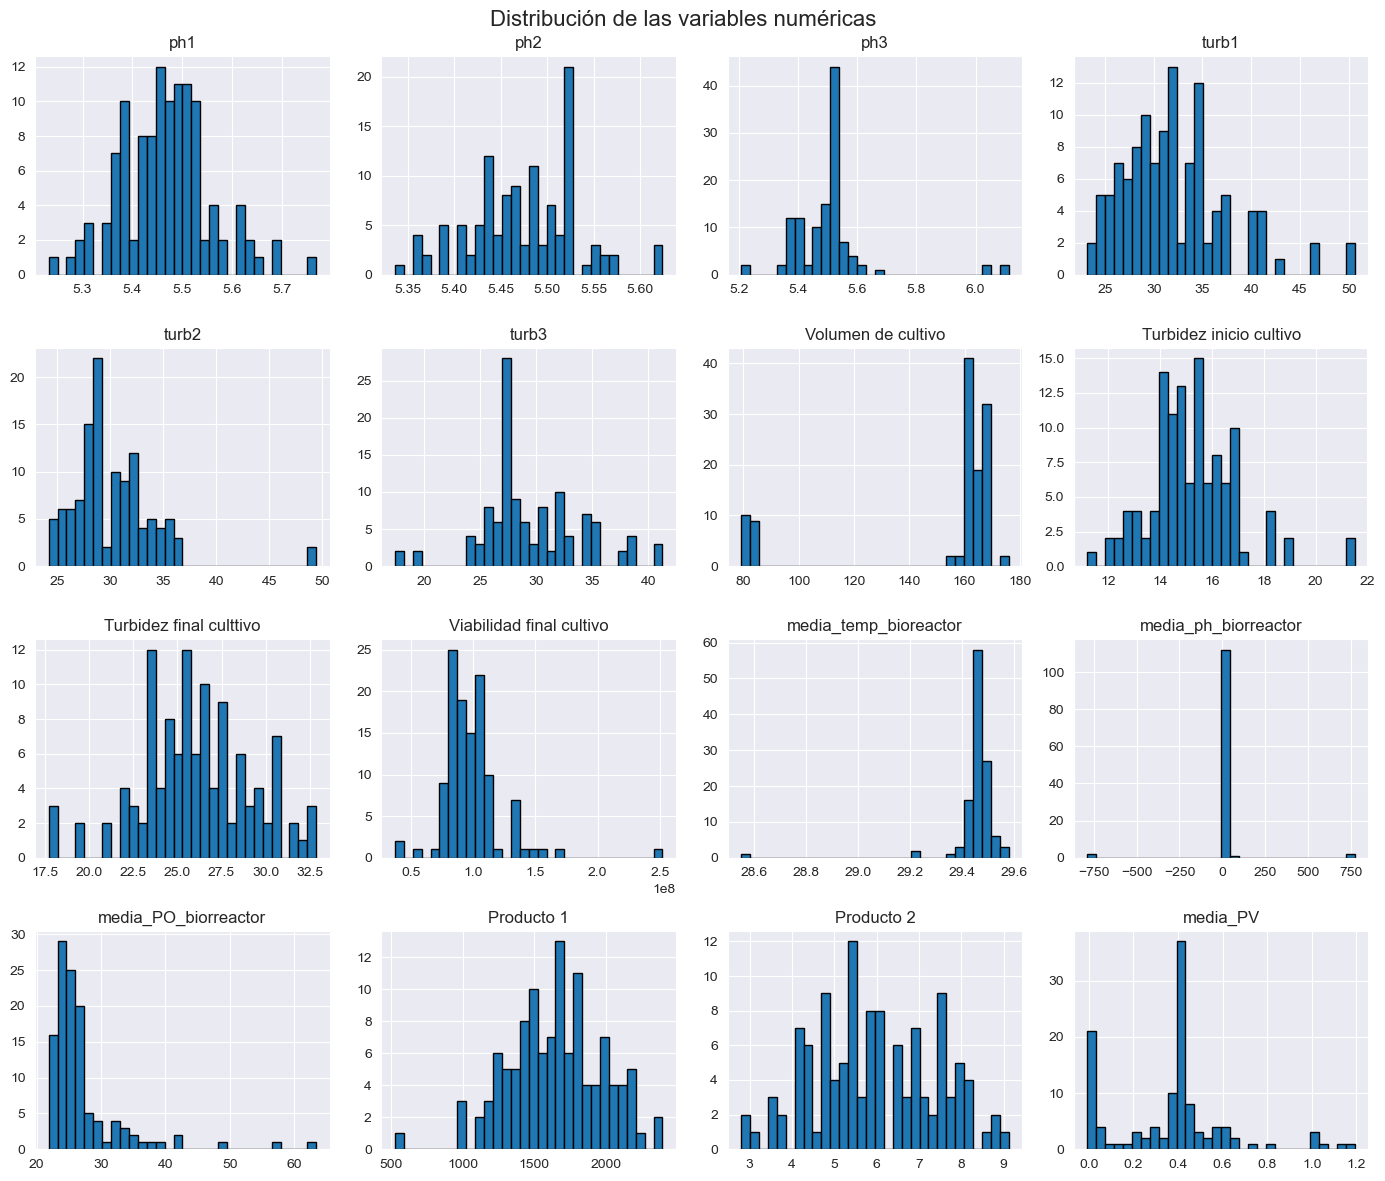

In [38]:
numeric_cols = ['ph1', 'ph2', 'ph3', 'turb1', 'turb2', 'turb3', 
                'Volumen de cultivo', 'Turbidez inicio cultivo', 
                'Turbidez final culttivo', 'Viabilidad final cultivo', 
                'media_temp_bioreactor', 'media_ph_biorreactor', 
                'media_PO_biorreactor', 'Producto 1', 'Producto 2', 'media_PV']

plt.figure(figsize=(14, 12))
merged_df[numeric_cols].hist(bins=30, figsize=(14, 12), edgecolor='black')
plt.suptitle('Distribución de las variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()


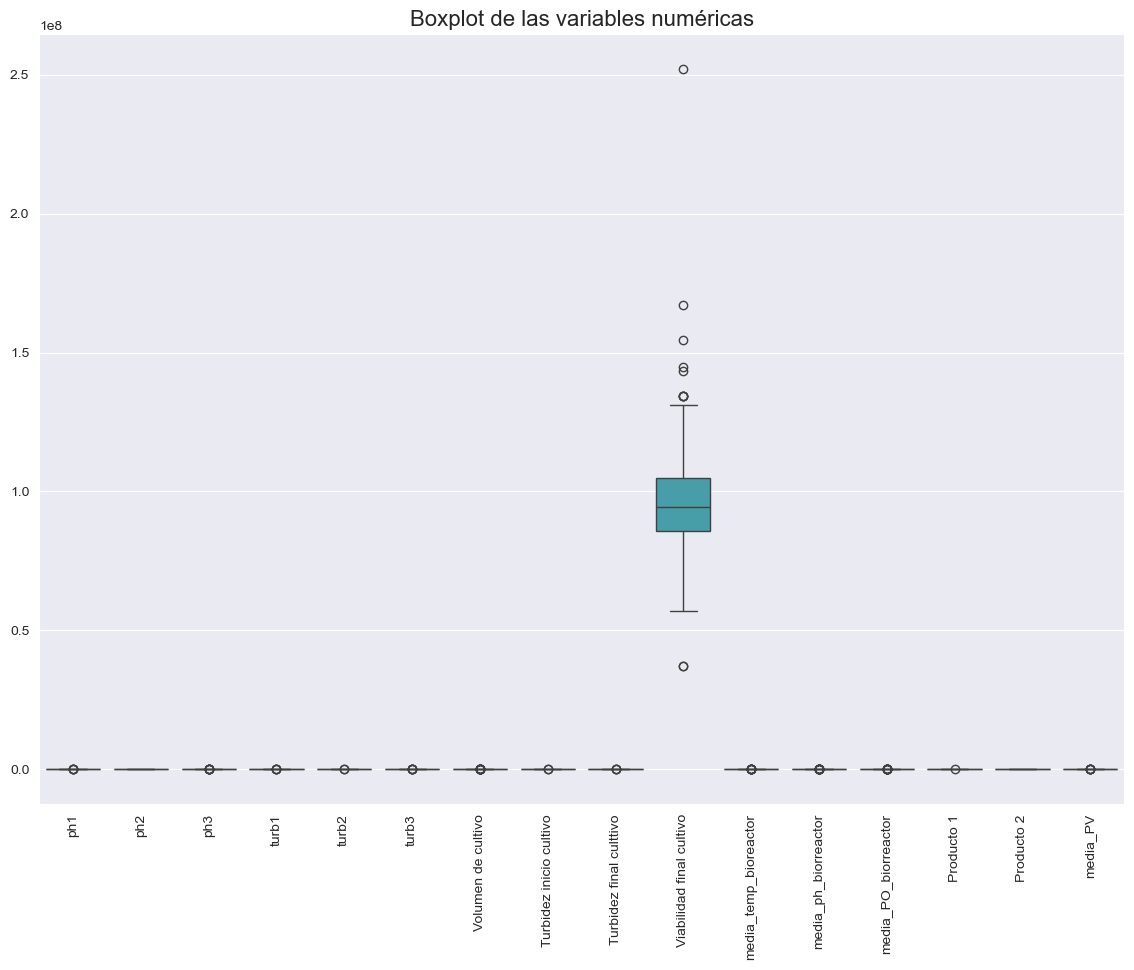

In [39]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=merged_df[numeric_cols])
plt.title('Boxplot de las variables numéricas', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [41]:
# after all the analysis, we saved the dataset with the important info to predict
merged_df = merged_df.fillna("NA")
output_file_path = './dataset_carol.csv' 
merged_df.to_csv(output_file_path, index=False)